In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,Count,Accel X,Accel Y,Accel Z,Gyro X,Gyro Y,Gyro Z,Target
0,1,-0.106800,-0.899333,-0.311333,-4.862667,1.241467,-4.845467,Not Fall
1,2,-0.168800,-0.918667,-0.323200,-3.316533,1.119867,-5.003333,Not Fall
2,3,-0.806800,-0.015733,-0.033733,2.998667,1.668800,11.923600,Not Fall
3,4,-0.863467,-0.027733,-0.022933,4.955867,1.051333,11.309467,Not Fall
4,5,0.108267,-0.962133,0.058267,-10.379600,9.546400,0.762400,Not Fall


In [ ]:
print(data.describe())

            Count     Accel X     Accel Y     Accel Z      Gyro X      Gyro Y  \
count  290.000000  290.000000  290.000000  290.000000  290.000000  290.000000   
mean   145.500000    4.277591   -3.867115   13.222036   -4.237752   -2.721737   
std     83.860002   51.836559   57.168429   90.393450    4.940716   45.658432   
min      1.000000   -0.913600 -742.000000   -1.019067  -14.493067 -774.000000   
25%     73.250000   -0.309100   -0.813067    0.017933   -7.345467   -2.271467   
50%    145.500000    0.005333   -0.157400    0.246400   -4.613067   -0.043533   
75%    217.750000    0.503467    0.144667    0.668867   -2.103433    2.253100   
max    290.000000  718.000000   92.000000  736.000000   11.094800   10.015467   

           Gyro Z      Target  
count  290.000000  290.000000  
mean    -1.559608    0.479310  
std     17.261929    0.500435  
min   -282.000000    0.000000  
25%     -3.232567    0.000000  
50%     -0.851333    0.000000  
75%      1.958467    1.000000  
max     11.923

In [ ]:
data.dtypes

,0
Count,int64
Accel X,float64
Accel Y,float64
Accel Z,float64
Gyro X,float64
Gyro Y,float64
Gyro Z,float64
Target,object


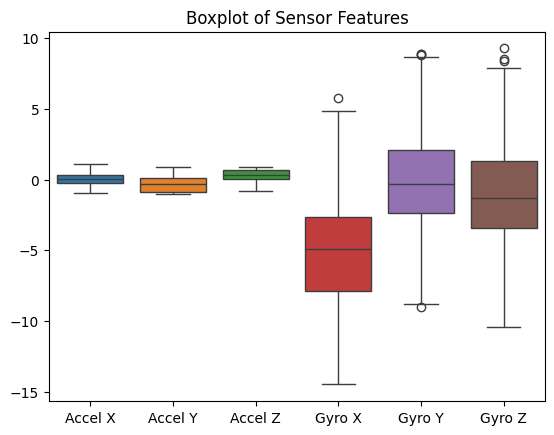

In [ ]:
sns.boxplot(data=data[features])
plt.title("Boxplot of Sensor Features")
plt.show()

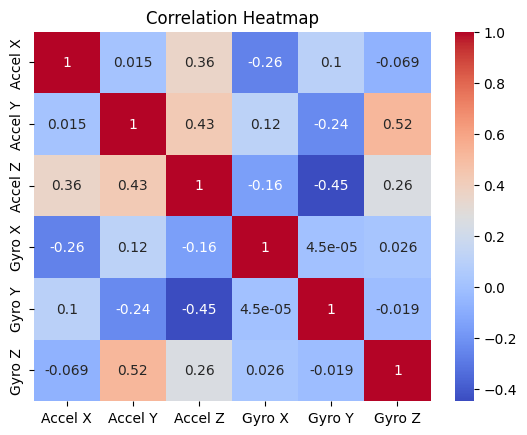

In [ ]:
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])  # "Not Fall" -> 0, "Fall" -> 1

# Define features and target
features = ["Accel X", "Accel Y", "Accel Z", "Gyro X", "Gyro Y", "Gyro Z"]

# Remove outliers using IQR
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

# Filter data to remove outliers
data = data[~((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Prepare features and target after filtering
X = data[features].values
y = data["Target"].values

# Data Augmentation Functions
def add_noise(data, noise_level=0.01):
    """ Add Gaussian noise to the data """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def scale_data(data, scale_factor=1.1):
    """ Scale the data by a small factor """
    return data * scale_factor

def shift_data(data, shift_value=0.1):
    """ Shift the data by a small value """
    return data + shift_value

# Apply augmentation
X_augmented = np.concatenate([
    X,
    add_noise(X, noise_level=0.02),
    scale_data(X, scale_factor=1.05),
    shift_data(X, shift_value=0.02)
])
y_augmented = np.concatenate([y, y, y, y])

print(f"Original data shape: {X.shape}")
print(f"Augmented data shape: {X_augmented.shape}")

# Normalize the feature values
scaler = RobustScaler()
X_augmented = scaler.fit_transform(X_augmented)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)


Original data shape: (228, 6)
Augmented data shape: (912, 6)


In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Data type of y_train:", y_train.dtype)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Unique values in y_train: [0 1]
Data type of y_train: int64
X_train shape: (729, 6)
X_test shape: (183, 6)
y_train shape: (729,)
y_test shape: (183,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5369 - loss: 0.6946 - val_accuracy: 0.7603 - val_loss: 0.6249
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7607 - loss: 0.5944 - val_accuracy: 0.7808 - val_loss: 0.5503
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.5187 - val_accuracy: 0.8288 - val_loss: 0.4754
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8520 - loss: 0.4640 - val_accuracy: 0.8493 - val_loss: 0.4099
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8960 - loss: 0.3661 - val_accuracy: 0.8836 - val_loss: 0.3623
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.3369 - val_accuracy: 0.8836 - val_loss: 0.3196
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9017 - loss: 0.3000 - val_accuracy: 0.8836 - val_loss: 0.2997
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.2617 - val_accuracy: 0.8973 - val_loss:

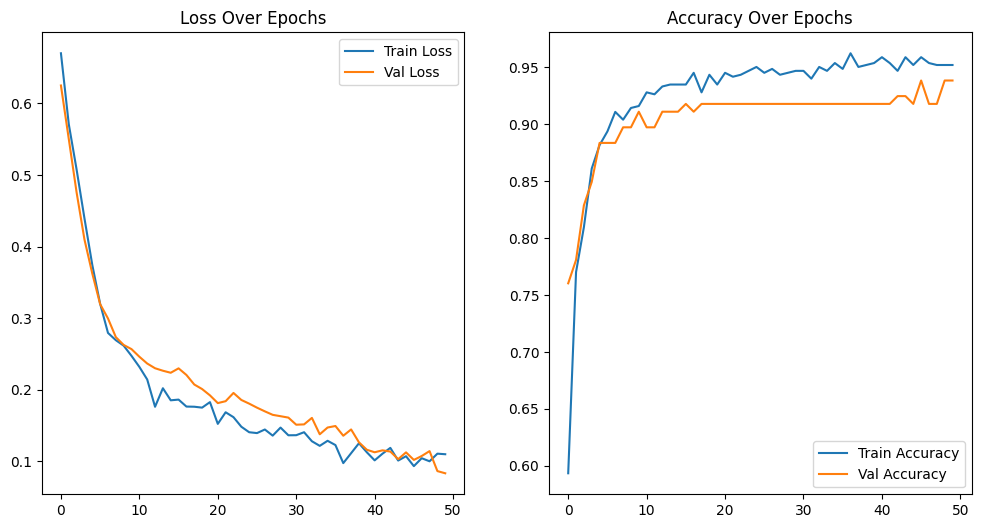

In [ ]:
# Build fully connected neural network
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))  # 6 features
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


In [ ]:
!pip install openpyxl

In [ ]:
# Export weights and biases to Exel

weights_biases = []
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        layer_info = {
            'layer_name': layer.name,
            'weights': weights.tolist(),
            'biases': biases.tolist()
        }
        weights_biases.append(layer_info)

# Write to Excel
excel_path = "/content/params.xlsx"
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    for i, layer_info in enumerate(weights_biases):
        df_weights = pd.DataFrame(layer_info['weights'])
        df_biases = pd.DataFrame(layer_info['biases']).transpose()
        df_weights.to_excel(writer, sheet_name=f'Layer_{i+1}_Weights', index=False)
        df_biases.to_excel(writer, sheet_name=f'Layer_{i+1}_Biases', index=False)

print(f"Weights and biases have been saved to {excel_path}")

Weights and biases have been saved to /content/params.xlsx


In [ ]:
# Check target distribution
print("Target Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

predictions = model.predict(X_train)
# Check first few predictions and outputs
print("Sample Predictions:", predictions[:5])
print("Sample Ground Truth:", y_train[:5])

Target Distribution in Training Data:
0    406
1    323
Name: count, dtype: int64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sample Predictions: [[0.9872366 ]
 [0.9948064 ]
 [0.99560267]
 [0.00972844]
 [0.08146824]]
Sample Ground Truth: [1 1 1 0 0]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


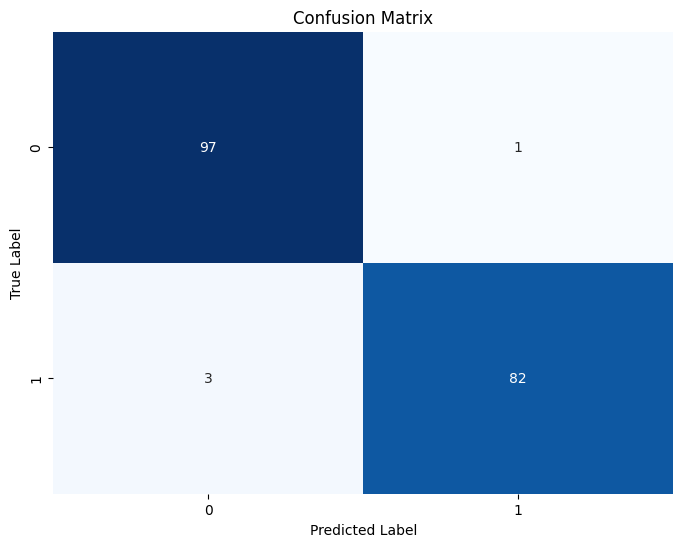

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán xác suất từ mô hình (dữ liệu test `X_test`)
predictions = model.predict(X_test)

# Chuyển đổi xác suất thành nhãn (0 hoặc 1) với ngưỡng 0.5
y_pred_classes = (predictions > 0.5).astype(int)  # Mặc định ngưỡng 0.5

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Trực quan hóa confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.99
Recall: 0.96
F1-Score: 0.98
